<a href="https://colab.research.google.com/github/mk-armah/BECE-Grade-Analysis/blob/master/tensorflow_snn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

In [84]:
def vgg_base(shape,out_units):
  vgg_base_model = tf.keras.applications.vgg19.VGG19(include_top = False,input_shape = shape,weights = 'imagenet')
  #freeze the top layers
  vgg_base_model.trainable = False
  inputs = tf.keras.layers.Input(shape,name = "input")
  #build a new fully connected layer
  x = tf.keras.layers.Flatten(name="flatten_input")(inputs)
  x = tf.keras.layers.Dense(128, activation='relu', name="dense1")(x)
  x = tf.keras.layers.Dropout(0.2, name="first_dropout")(x)
  x = tf.keras.layers.Dense(128, activation='relu', name="dense2")(x)
  x = tf.keras.layers.Dropout(0.1, name="second_dropout")(x)
  x = tf.keras.layers.Dense(out_units, activation='relu', name="dense3")(x)
  
  return tf.keras.models.Model(inputs = inputs,outputs = x)

In [85]:
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [86]:
model = vgg_base((224,224,3),128)

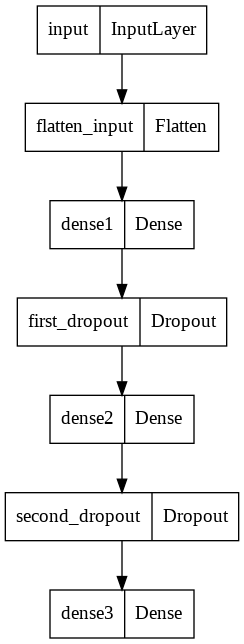

In [87]:
tf.keras.utils.plot_model(model)

In [88]:
def siemese_network(base_network = vgg_base):
  """construct the siemese network architecture"""
  # create the left input and point to the base network
  input_a = tf.keras.layers.Input(shape=(224,224,3), name="left_input")
  vect_output_a = base_network(input_a)

  # create the right input and point to the base network
  input_b = tf.keras.layers.Input(shape=(224,224,3), name="right_input")
  vect_output_b = base_network(input_b)

  # measure the similarity of the two vector outputs
  output = tf.keras.layers.Lambda(euclidean_distance, name="output_layer", output_shape=eucl_dist_output_shape)([vect_output_a, vect_output_b])

  # specify the inputs and output of the model
  model = tf.keras.models.Model([input_a, input_b], output)

  # plot model graph
  tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='outer-model.png')

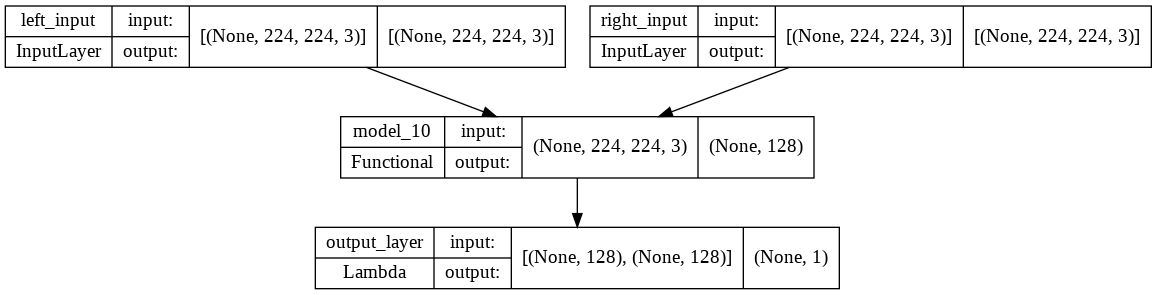